

# Project: Investigate a Dataset ( Tmdb Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains information about 10000 movies collected from The Movies Database(TMDB).

The dataset also contains information about the movies grouped in 21 columns, i also deleted irrelevant 

columns in the course of data cleaning.

In the course of exploration i intend to answer question such as:

1. which genres are most popularfrom year to year?

2. What kinds of properties are associated with movies that have high revenue?




In [13]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns




df_movies = pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling


In the data wrangling process. i took the following steps:

1. checked for null values and removed columns with null values
2. checked for dublicates and removed dublicate rows
3. removed irrelevant columns
4. split and exploded the genres columns

### General Properties

In [2]:
df_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:


#getting information about the project

df_movies.info(), df_movies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(None, (10866, 21))

In [4]:
#checking for missing values in table rows


df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



### Data Cleaning

steps taken to clean the data
1. I checked for  and  dropped columns with null values
2. I checked for and dropped columns with dublicate rows
3. I also dropped irrelevant columns
4. I also split and exploded the genres columns 


In [12]:
#dropping rows with empty data

df_movies.dropna(inplace = True)

In [6]:
#check if rows with empty data still exist
df_movies.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [10]:
#check for table dublicates 
sum(df_movies.duplicated())

0

In [14]:
# dropping irrelevant columns
df_movies.drop(['id','imdb_id','homepage'], axis = 1, inplace=True)

In [15]:
#check if irrelevant tables have been dropped
df_movies.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [16]:
#checking for unique values in the genres column

df_movies['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [17]:
#checking to see what my genres look like 
df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [18]:
 #reassigning df_movies to clean_df so that df_movies remains safe
clean_df = df_movies

In [19]:
#checking what the genres column looks like
clean_df.head(1)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [20]:
#convert genre column to a list and then exploding the list so  they can be in seperate lists
#assign result to df_genre

def split_column_genres():
    return clean_df.assign(genres =clean_df['genres'].str.split('|')).explode('genres')
    

df_genre = split_column_genres()


In [21]:
#checking if changed have been made sucessfully

df_genre.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Which genres are most popular from year to year?

#### first we need to find the mean popularity for each movie genre

In [22]:
df_genre.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26983.000000,2.698300e+04,2.698300e+04,26983.000000,26983.000000,26983.000000,26983.000000,2.698300e+04,2.698300e+04
mean,0.705633,1.749520e+07,4.739459e+07,102.771004,249.775674,5.956754,2000.703517,2.102318e+07,6.082685e+07
std,1.114518,3.459516e+07,1.321502e+08,30.408833,637.728286,0.912326,12.763871,3.818562e+07,1.614585e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.224450,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.411236,9.500000e+01,0.000000e+00,99.000000,44.000000,6.000000,2005.000000,1.044719e+02,0.000000e+00
75%,0.774042,2.000000e+07,3.052476e+07,112.000000,173.000000,6.600000,2011.000000,2.704173e+07,4.359754e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [25]:
#find the mean popularity for each movie genre

df_popular = df_genre.groupby('genres').mean().popularity

In [35]:
df_popular

genres
Action             0.926136
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744821
Documentary        0.181432
Drama              0.591496
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001218
TV Movie           0.270896
Thriller           0.741513
War                0.727683
Western            0.590615
Name: popularity, dtype: float64

In [27]:
df_popular.index

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genres')

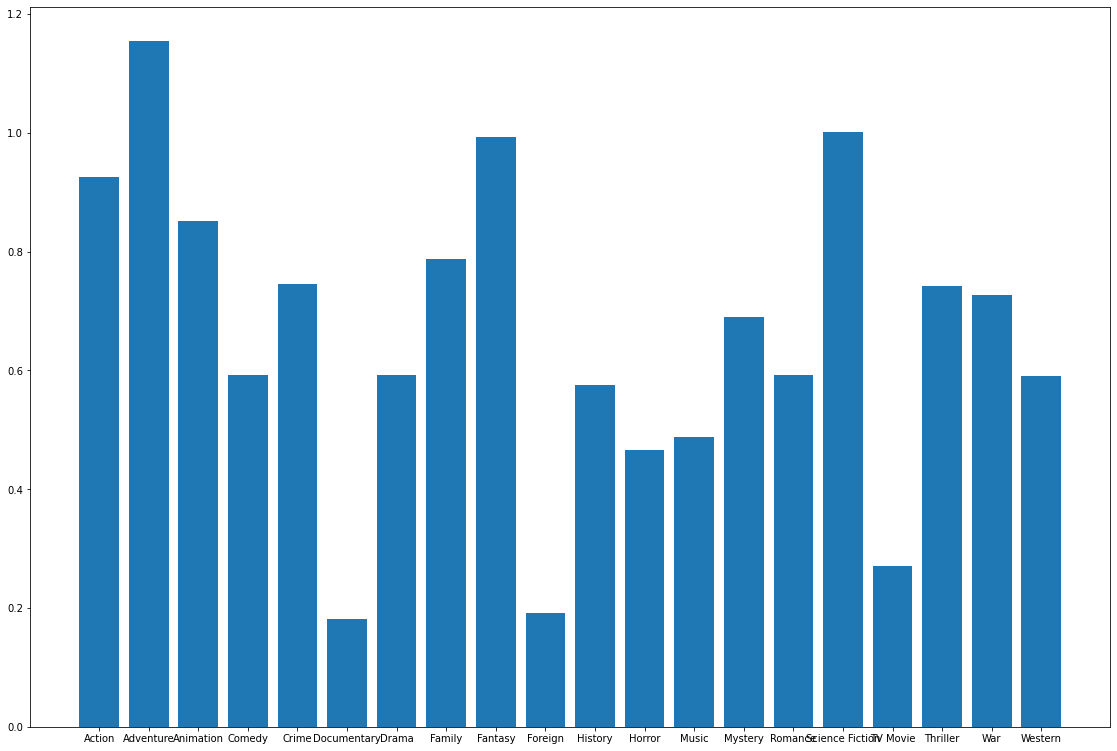

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
ax.bar(df_popular.index,df_popular)
plt.show()

## Findings

1. The barchart above shows that adventure movies are more popular.
2. The science fiction is second.

### What kinds of properties are associated with movies that have high revenue?

In [39]:
#structure of dataset
df_genre.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26983.000000,2.698300e+04,2.698300e+04,26983.000000,26983.000000,26983.000000,26983.000000,2.698300e+04,2.698300e+04
mean,0.705633,1.749520e+07,4.739459e+07,102.771004,249.775674,5.956754,2000.703517,2.102318e+07,6.082685e+07
std,1.114518,3.459516e+07,1.321502e+08,30.408833,637.728286,0.912326,12.763871,3.818562e+07,1.614585e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.224450,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.411236,9.500000e+01,0.000000e+00,99.000000,44.000000,6.000000,2005.000000,1.044719e+02,0.000000e+00
75%,0.774042,2.000000e+07,3.052476e+07,112.000000,173.000000,6.600000,2011.000000,2.704173e+07,4.359754e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [40]:
#get mean revenue generated

df_genre.revenue.mean()

47394593.13856873

In [45]:
# select samples of movies tha generated revenue above mean revenue

high_revenue_movies = df_genre.query(f'revenue >= {df_genre.revenue.mean()}')

In [48]:
high_revenue_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5534.000000,5.534000e+03,5.534000e+03,5534.000000,5534.000000,5534.000000,5534.000000,5.534000e+03,5.534000e+03
mean,1.779659,6.026684e+07,2.115654e+08,113.302132,919.834116,6.279960,2002.034333,6.914882e+07,2.642805e+08
std,1.986885,5.147167e+07,2.254229e+08,24.834288,1145.958532,0.725833,10.422604,5.264370e+07,2.705759e+08
min,0.010335,0.000000e+00,4.741000e+07,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,4.473367e+07
25%,0.794822,2.400000e+07,7.773885e+07,98.000000,230.000000,5.800000,1997.000000,3.042076e+07,9.766656e+07
50%,1.259399,4.700000e+07,1.309233e+08,110.000000,501.000000,6.300000,2004.000000,5.628752e+07,1.724809e+08
75%,2.060162,8.000000e+07,2.483846e+08,124.000000,1116.000000,6.800000,2010.000000,9.544480e+07,3.269152e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [60]:
h_revenue_df = high_revenue_movies.genres.value_counts()

In [62]:
h_revenue_df.index

Index(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
       'Family', 'Crime', 'Science Fiction', 'Fantasy', 'Horror', 'Mystery',
       'Animation', 'History', 'Music', 'War', 'Western', 'Documentary',
       'Foreign'],
      dtype='object')

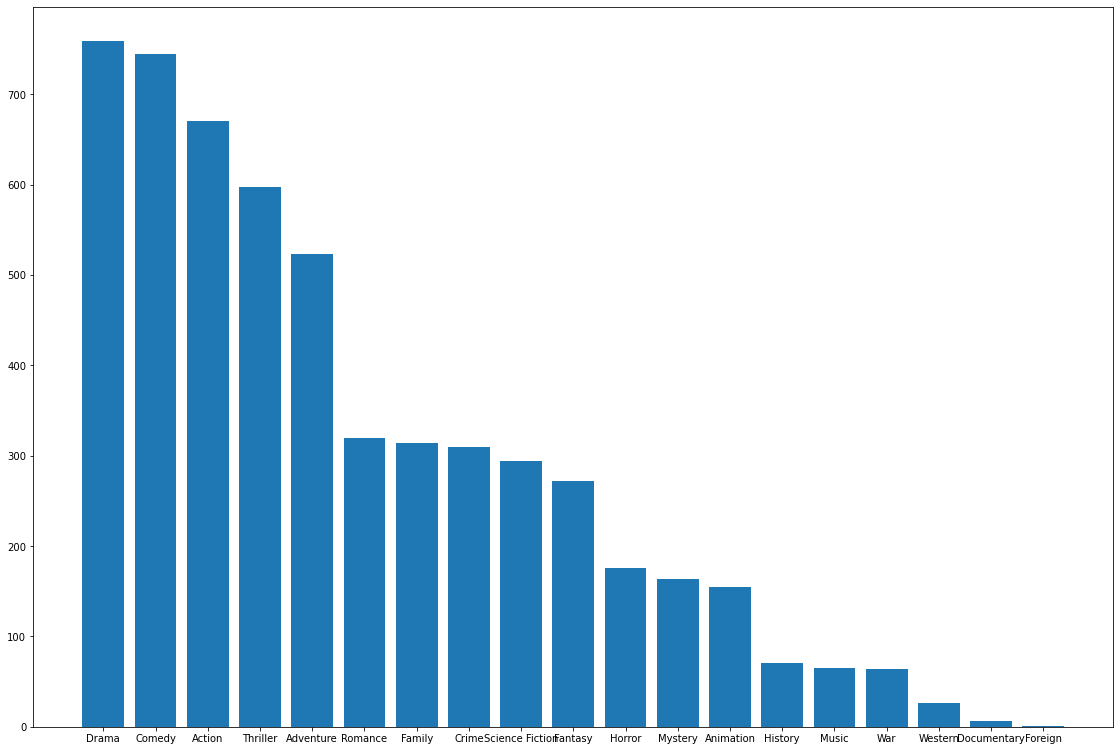

In [63]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
ax.bar(h_revenue_df.index,h_revenue_df)
plt.show()

#### more drama  movies generated more revenue

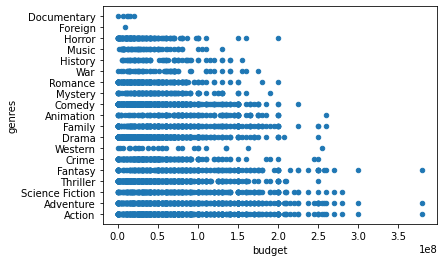

In [49]:
high_revenue_movies.plot(x="budget", y="genres", kind="scatter");

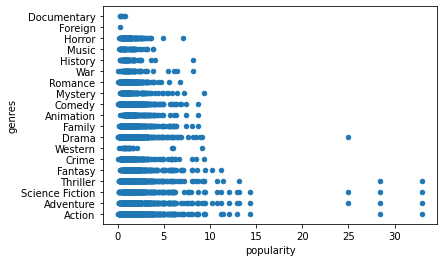

In [50]:
high_revenue_movies.plot(x="popularity", y="genres", kind="scatter");

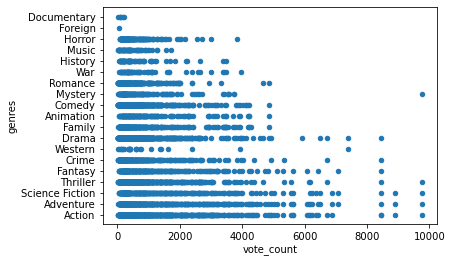

In [51]:
high_revenue_movies.plot(x="vote_count", y="genres", kind="scatter");

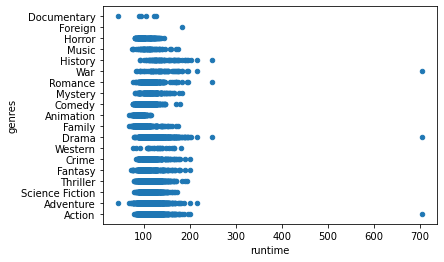

In [52]:
high_revenue_movies.plot(x="runtime", y="genres", kind="scatter");

### findings
1. properties such as vote count, popularity and budget have  strong effect on the revenue generated
2. the effect of the runtime is not that strong on the revenue generated
3. budget and vote count have the strongest effect

<a id='conclusions'></a>
## Conclusions

1. the adventure movies are most popular from year to year
2. the budget and vote count have the strongest effects on the revenue generated from the movie project

### limitations
1. not enough test sample